In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re

In [12]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')
# Download the punkt_tab resource
nltk.download('punkt_tab')

# Step 1: Upload Dataset in Google Colab
from google.colab import files
uploaded = files.upload()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Saving imdb_labelled.txt to imdb_labelled (3).txt


In [13]:
# Display the first few rows of the dataset
print(data.head())

                                              review  sentiment  review_length
0  slow moving aimless movie distressed drifting ...          0             55
1  sure lost flat characters audience nearly half...          0             53
2  attempting artiness black white clever camera ...          0            137
3                        little music anything speak          0             27
4  best scene movie gerardo trying find song keep...          1             60


In [15]:
dataset_path = "imdb_labelled.txt"

# Step 2: Load Dataset
# The dataset has tab-separated values, no headers
data = pd.read_csv(dataset_path, sep='\t', header=None, names=['review', 'sentiment'])

# Step 3: Preprocess the text data
def preprocess_text(text):
    text = re.sub(r'\W', ' ', str(text))          # Remove non-word characters
    text = re.sub(r'\s+', ' ', text)             # Remove extra spaces
    text = text.lower()                          # Convert to lowercase
    tokens = word_tokenize(text)                 # Tokenize words
    filtered_tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(filtered_tokens)

data['review'] = data['review'].apply(preprocess_text)

# Step 4: Split the data into training and testing sets
X = data['review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Convert text data into vectors using CountVectorizer
vectorizer = CountVectorizer(max_features=5000)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

# Step 6: Train a Naive Bayes Classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectors, y_train)

# Step 7: Make Predictions and Evaluate
y_pred = classifier.predict(X_test_vectors)

# Print the accuracy and classification report
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on test set: 0.7933333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        76
           1       0.77      0.82      0.80        74

    accuracy                           0.79       150
   macro avg       0.79      0.79      0.79       150
weighted avg       0.79      0.79      0.79       150



In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming you have y_test (true values) and y_pred (predicted values)
mae = mean_absolute_error(y_test, y_pred)
# Calculate RMSE from MSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate RAE and RRSE
# We need the mean of the true values for these calculations
y_test_mean = y_test.mean()

rae = mean_absolute_error(y_test, y_pred) / mean_absolute_error(y_test, [y_test_mean] * len(y_test))
# Calculate RRSE using MSE to avoid 'squared' parameter issue
rrse = np.sqrt(mean_squared_error(y_test, y_pred)) / np.sqrt(mean_squared_error(y_test, [y_test_mean] * len(y_test)))


print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Relative Absolute Error: {rae}')
print(f'Root Relative Squared Error: {rrse}')

Mean Absolute Error: 0.20666666666666667
Root Mean Squared Error: 0.4546060565661952
Relative Absolute Error: 0.41340682788051214
Root Relative Squared Error: 0.9092929427643348


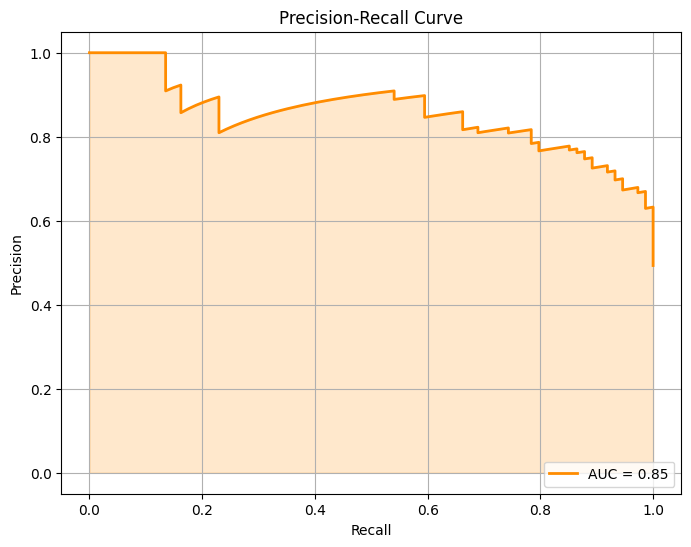

Area Under the Precision-Recall Curve (AUC-PRC): 0.85


In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Assuming you have y_test (true values), y_pred (predicted values),
# and classifier is your trained model

# Get probabilities for the positive class
y_scores = classifier.predict_proba(X_test_vectors)[:, 1]

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the area under the curve (AUC)
auc_prc = auc(recall, precision)

# Plot the Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'AUC = {auc_prc:.2f}')
plt.fill_between(recall, precision, alpha=0.2, color='darkorange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f'Area Under the Precision-Recall Curve (AUC-PRC): {auc_prc:.2f}')

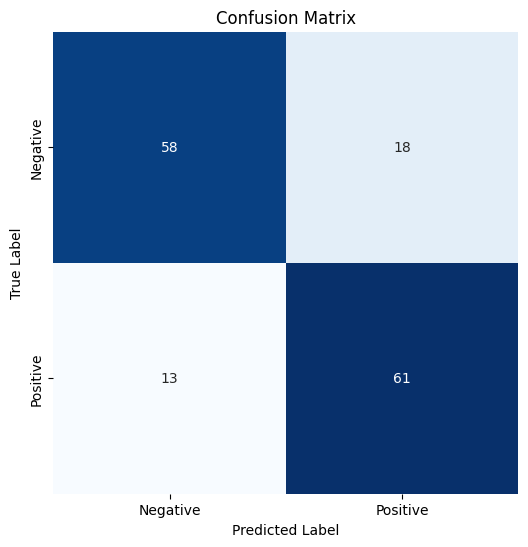

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Assuming you have y_test (true values), y_pred (predicted values),
# X_train_vectors, vectorizer, etc.

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

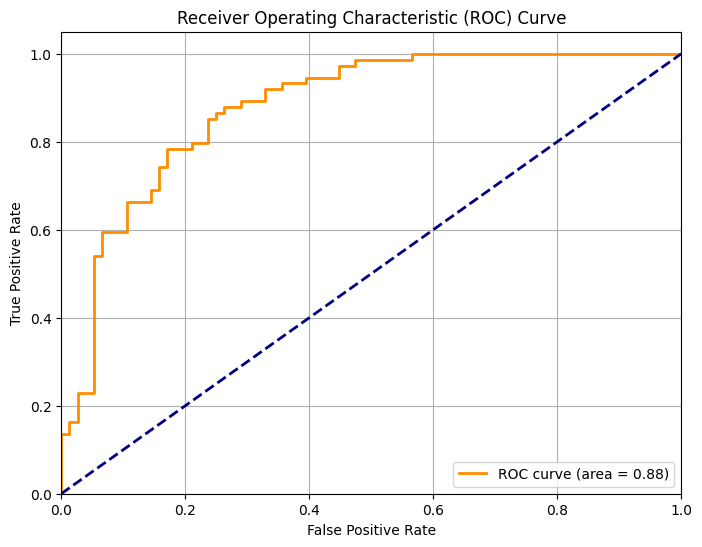

In [19]:
# 2. ROC Curve
y_scores = classifier.predict_proba(X_test_vectors)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


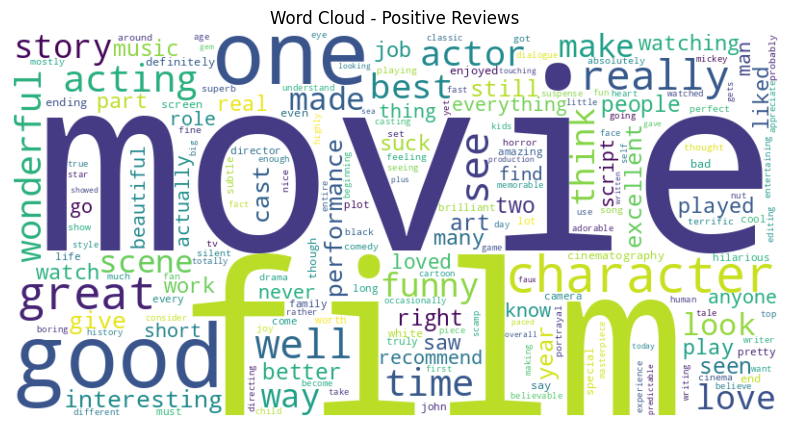

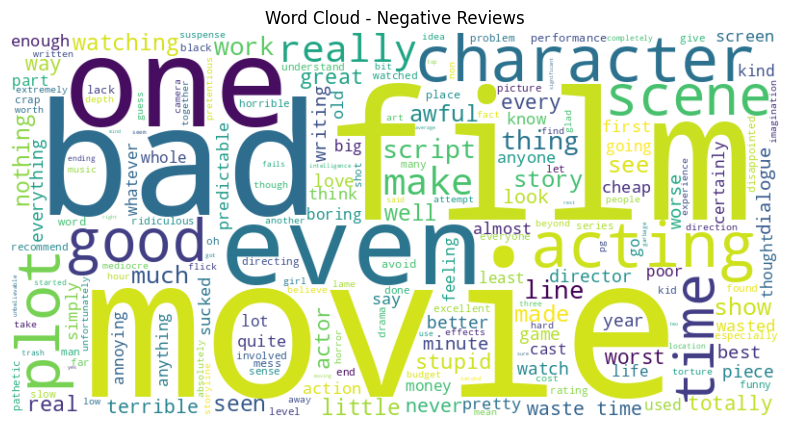

In [20]:
# 3. Word Cloud of Most Frequent Words (for positive and negative reviews)
from wordcloud import WordCloud

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

positive_reviews = ' '.join(data[data['sentiment'] == 1]['review'])
negative_reviews = ' '.join(data[data['sentiment'] == 0]['review'])

create_wordcloud(positive_reviews, 'Word Cloud - Positive Reviews')
create_wordcloud(negative_reviews, 'Word Cloud - Negative Reviews')

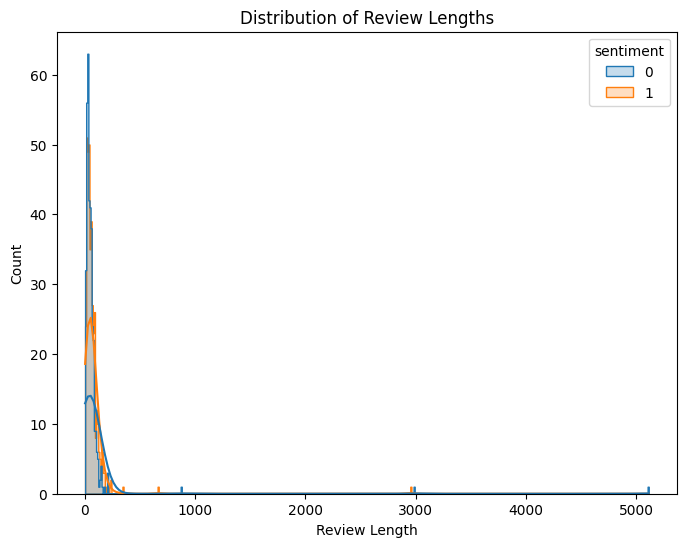

In [21]:
# 4. Distribution of Review Lengths
data['review_length'] = data['review'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data, x='review_length', hue='sentiment', element='step', kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()